# Evaluation of the MADDPG Stock Market

In [1]:
from __future__ import annotations

import sys

#sys.path.append('C:\\Users\\scien\\OneDrive\\Desktop\\fa2022\\cs285\\stock_market')
print(sys.path)

import math
import os
from typing import Dict

import numpy as np
import pandas as pd
import seaborn as sns
import torch as th
from matplotlib import pyplot as plt

from stock_market.ddpg import DDPGAgent
from stock_market.env import StockMarketEnv
from stock_market.types import OptInt, PathLike
from stock_market.utils import get_agent_dims, process_step_ac

plt.style.use('seaborn-paper')
sns.set_style('whitegrid')

['C:\\Users\\scien\\OneDrive\\Desktop\\fa2022\\cs285\\stock_market\\stock_market\\notebook', 'C:\\Users\\scien\\anaconda3\\envs\\cs285\\python37.zip', 'C:\\Users\\scien\\anaconda3\\envs\\cs285\\DLLs', 'C:\\Users\\scien\\anaconda3\\envs\\cs285\\lib', 'C:\\Users\\scien\\anaconda3\\envs\\cs285', '', 'C:\\Users\\scien\\anaconda3\\envs\\cs285\\lib\\site-packages', 'c:\\users\\scien\\onedrive\\desktop\\fa2022\\cs285\\homework_fall2022\\hw2', 'C:\\Users\\scien\\anaconda3\\envs\\cs285\\lib\\site-packages\\win32', 'C:\\Users\\scien\\anaconda3\\envs\\cs285\\lib\\site-packages\\win32\\lib', 'C:\\Users\\scien\\anaconda3\\envs\\cs285\\lib\\site-packages\\Pythonwin', 'C:\\Users\\scien\\anaconda3\\envs\\cs285\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\scien\\.ipython', 'C:\\Users\\scien\\OneDrive\\Desktop\\fa2022\\cs285\\stock_market']


C:\Users\scien\anaconda3\envs\cs285\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Environment Arguments
num_agents: int = 5
max_cycles: int = 390
num_company: int = 5

# Network Arguments
exp_name: str = 'stock_market_5__budget_discount_0.95'
epoch: int = 100
ckpt_dir: PathLike = os.path.join(
    f'../exp_logs/13-12-2022_01-09-27_{exp_name:s}',
    'checkpoint',
    f'{exp_name:s}_{epoch:d}.pt'
)
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Modify accordingly
batch_size: int = 64
device = th.device('cuda')
max_episode_steps: OptInt = None

In [3]:
# Make Stock Market Environment
env = StockMarketEnv(
    num_agents=num_agents,
    max_cycles=max_cycles,
    num_company=num_company,
    seed=1,
)
obs_n = env.reset()
print('Agents: ', list(obs_n.keys()))

Agents:  ['agent_0', 'agent_1', 'agent_2', 'agent_3', 'agent_4']


In [4]:
# Load checkpoints
agents: Dict[str, DDPGAgent] = {}

# Initialize environment information
agent_dim = get_agent_dims(env)
if hasattr(env, 'state_space'):
    ob_n_dim = env.state_space.shape[0]
else:
    ob_n_dim = sum(val[0] for val in agent_dim.values())
ac_n_dim = sum(val[1] for val in agent_dim.values())

state_dict = th.load(ckpt_dir)
for agent_id, (ob_dim, ac_dim) in agent_dim.items():
    agent = DDPGAgent(action_space=env.action_space(agent_id),
                     critic_observation_size=ob_n_dim,
                     policy_observation_size=ob_dim,
                     critic_action_size=ac_n_dim,
                     policy_action_size=ac_dim,
                     device=device,
                     learning_rate=1e-4)
    agent.load_state_dict(state_dict[agent_id])
    agents[agent_id] = agent

[376 985  49 693  81]
[ 41331.69189453 101247.96777344   7579.5144043   71379.14916992
  10136.5378418 ]
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'ag

C:\Users\scien\anaconda3\envs\cs285\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in arctanh


{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}

{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}

{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}

{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}

{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
{'agent_0': False, 'agent_1': False, 'agent_2': False, 'agent_3': False, 'agent_4': False}
[ 376    0   49  693 1066]
[ 820.36868908 2033.81524473  150.44136861 1416.76317489  174.97401918]


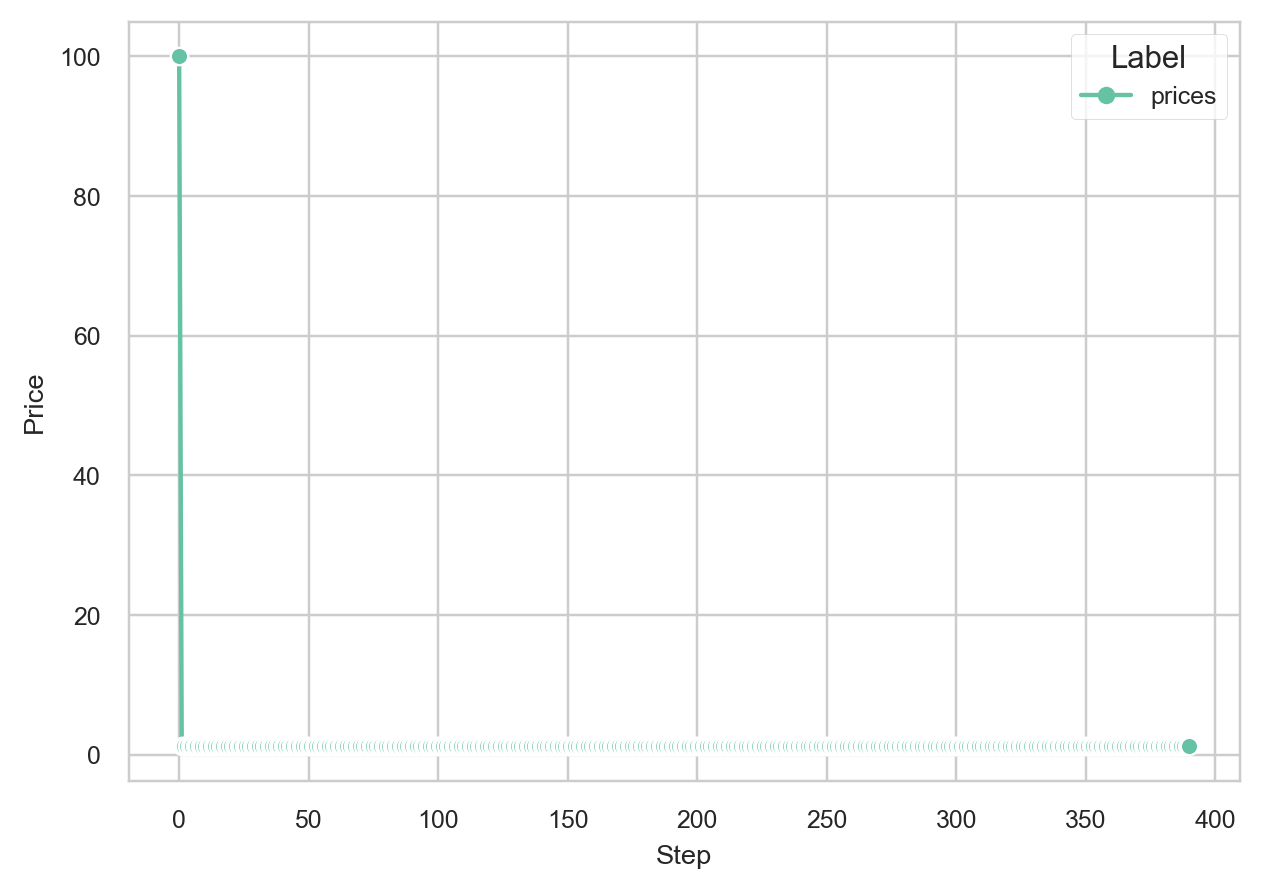

In [8]:
# Evaluation for one episode
episode_data = pd.DataFrame(columns=['Step', 'Price', 'Label'])

ob_n = env.reset()
state = env.state()
episode_done = False
step: int = 1

episode_data.loc[len(episode_data)] = [0, state[0], 'prices']
print(env.shares)
print(env.budgets)
while env.agents and not episode_done:
    actions = {}
    for agent_id, ob in ob_n.items():
        ob = th.from_numpy(ob).view(1, -1).float().to(device)
        ac = agents[agent_id].get_action(ob, explore=False)
        actions[agent_id] = process_step_ac(ac, env.action_space(agent_id))
    actions['agent_1'] = (1.2, -1)
    actions['agent_4'] = (1.3, 1)
    
    if step == 1:
        print_action = {}
        for key, val in actions.items():
            print_action[key] = (
                np.exp(np.arctanh(val[0])) + 1.0,
                math.ceil(100000 * val[1] - 0.5)
            )
        #print(print_action)
    #print(actions)
    
    ob_n, _, done_n, truncated_n, info = env.step(actions)
    print(done_n)
    
    episode_done = all(truncated_n.values())

    # Process and store data
    for key, value in info.items():
        if isinstance(value, float):
            episode_data.loc[len(episode_data)] = [step, value, key]
        if isinstance(value, np.ndarray):
            episode_data = pd.concat([
                episode_data,
                pd.DataFrame.from_dict({
                    'Step': [step] * len(value),
                    'Price': value,
                    'Label': [key] * len(value)
                })
            ])

    step += 1
    
print(env.shares)
print(env.budgets)

# Plotting
fig, ax = plt.subplots(1, 1, dpi=224)
ax = sns.lineplot(
    # data=episode_data,
    data=episode_data[episode_data['Label'] == 'prices'],
    x='Step', y='Price', hue='Label', palette='Set2',
    style='Label', markers=True, dashes=False, ax=ax
)
# ax.set_yscale('log')

In [7]:
episode_data[episode_data['Label'] == 'prices']

,Step,Price,Label
0,0,100.0,prices
1,1,100.0,prices
31,2,100.0,prices
61,3,100.0,prices
91,4,100.0,prices
...,...,...,...
11551,386,100.0,prices
11581,387,100.0,prices
11611,388,100.0,prices
11641,389,100.0,prices


In [15]:
%reload_ext tensorboard
%tensorboard --logdir C:/Users/scien/OneDrive/Desktop/fa2022/cs285/stock_market/stock_market/exp_logs --host 127.0.0.1

Reusing TensorBoard on port 6006 (pid 8808), started 6:01:10 ago. (Use '!kill 8808' to kill it.)

In [47]:
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def get_section_results(file, do_print=False):
    """
        requires tensorflow==1.12.0
    """
    episode_returns = {}
    critic_loss = {}
    policy_loss = {}
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            tags = v.tag.split('/')
            agent_i = tags[0]
            metric = tags[2]
            if metric == 'episode_returns':
                if agent_i not in episode_returns.keys():
                    episode_returns[agent_i] = []
                episode_returns[agent_i].append(v.simple_value)
            elif metric == 'critic_loss':
                if agent_i not in critic_loss.keys():
                    critic_loss[agent_i] = []
                critic_loss[agent_i].append(v.simple_value)
            if metric == 'policy_loss':
                if agent_i not in policy_loss.keys():
                    policy_loss[agent_i] = []
                policy_loss[agent_i].append(v.simple_value)
    #if do_print:
    #    for i, (x, y) in enumerate(zip(X, Y)):
    #        print('Iteration {:d} | Train steps: {:d} | Return: {} | Eval_AverageReturn: {}' .format(i, int(x), y, z))
    return [i for i in range(len(episode_returns['agent_0']))], episode_returns, critic_loss, policy_loss

Text(0.5, 1.0, 'Budget Discount 0.95 Episode Returns')

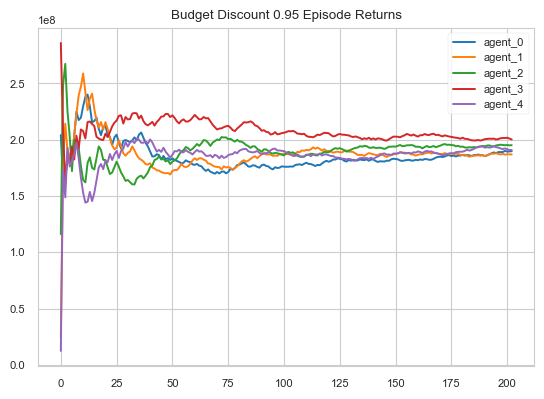

In [55]:
run_log = "..\\exp_logs\\13-12-2022_01-09-27_stock_market_5__budget_discount_0.95\\logs\\*"
eventfile = glob.glob(run_log)[0]
n, episode_returns, critic_loss, policy_loss = get_section_results(eventfile)

for k, v in episode_returns.items():
    plt.plot(n, v, label=k)
plt.legend()
plt.title('Budget Discount 0.95 Episode Returns')

Text(0.5, 1.0, 'Budget Discount 0.95 Critic Loss')

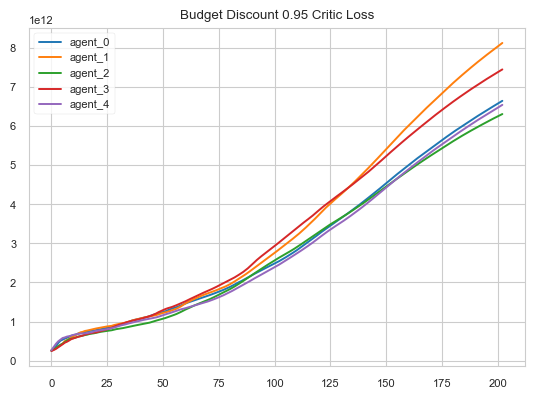

In [57]:
for k, v in critic_loss.items():
    plt.plot(n, v, label=k)
plt.legend()
plt.title('Budget Discount 0.95 Critic Loss')

Text(0.5, 1.0, 'Budget Discount 0.95 Policy Loss')

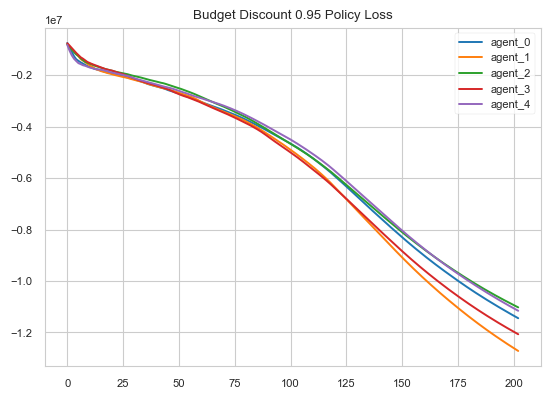

In [58]:
for k, v in policy_loss.items():
    plt.plot(n, v, label=k)
plt.legend()
plt.title('Budget Discount 0.95 Policy Loss')